In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/

/content


In [3]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import opendatasets as od
import pandas

od.download("https://www.kaggle.com/datasets/francismon/curated-covid19-chest-xray-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: arceus948
Your Kaggle Key: ··········


100%|██████████| 412M/412M [00:22<00:00, 18.9MB/s]


In [5]:
%cd '/content/curated-covid19-chest-xray-dataset/'

/content/curated-covid19-chest-xray-dataset


In [6]:
!mkdir '/content/curated-covid19-chest-xray-dataset/imagefiles'
!mkdir '/content/curated-covid19-chest-xray-dataset/labelfiles'
!mkdir '/content/curated-covid19-chest-xray-dataset/savedmodels'

In [7]:
!ls

dataset  imagefiles  labelfiles  savedmodels


### Loading dataset into npy files

In [8]:
import numpy as np
import os
import cv2

# Set the paths to your train and validation folders
train_folder = '/content/curated-covid19-chest-xray-dataset/dataset/train'
val_folder = '/content/curated-covid19-chest-xray-dataset/dataset/validation'

# Set the number of classes
num_classes = 3

# Function to load and preprocess the images
def preprocess_images(image_folder):
    images = []
    labels = []
    
    for class_id, class_name in enumerate(sorted(os.listdir(image_folder))):
        class_path = os.path.join(image_folder, class_name)
        if os.path.isdir(class_path):
            for image_name in os.listdir(class_path):
                image_path = os.path.join(class_path, image_name)
                if image_path.endswith('.jpg') or image_path.endswith('.png'):
                    image = cv2.imread(image_path)
                    
                    # Resize the image to (128, 128)
                    image = cv2.resize(image, (128, 128))
                    
                    # Perform any other necessary preprocessing steps here
                    
                    images.append(image)
                    labels.append(class_id)
    
    return images, labels

# Preprocess the train images and labels
train_images, train_labels = preprocess_images(train_folder)

# Preprocess the validation images and labels
val_images, val_labels = preprocess_images(val_folder)

# Convert the lists to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)
val_images = np.array(val_images)
val_labels = np.array(val_labels)

# Save the numpy arrays to files
np.save('/content/curated-covid19-chest-xray-dataset/imagefiles/train_img.npy', train_images)
np.save('/content/curated-covid19-chest-xray-dataset/labelfiles/train_labels.npy', train_labels)
np.save('/content/curated-covid19-chest-xray-dataset/imagefiles/val_img.npy', val_images)
np.save('/content/curated-covid19-chest-xray-dataset/labelfiles/val_labels.npy', val_labels)

### Displaying loaded images

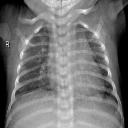

Train Label: 0


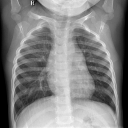

Validation Label: 0


In [9]:
import numpy as np
from google.colab.patches import cv2_imshow

# Load the numpy arrays
train_images = np.load('/content/curated-covid19-chest-xray-dataset/imagefiles/train_img.npy')
train_labels = np.load('/content/curated-covid19-chest-xray-dataset/labelfiles/train_labels.npy')
val_images = np.load('/content/curated-covid19-chest-xray-dataset/imagefiles/val_img.npy')
val_labels = np.load('/content/curated-covid19-chest-xray-dataset/labelfiles/val_labels.npy')

# Display the first image from train_images
cv2_imshow(train_images[0])
print('Train Label:', train_labels[0])

# Display the first image from val_images
cv2_imshow( val_images[0])
print('Validation Label:', val_labels[0])

# Wait for a key press and then close the windows
cv2.waitKey(0)
cv2.destroyAllWindows()

### Number of samples in each class in train dataset

In [10]:
import numpy as np

# Load the balanced train labels
train_labels_bal = np.load('/content/curated-covid19-chest-xray-dataset/labelfiles/train_labels.npy')

# Count the number of samples in each class
normal_bal = np.sum(train_labels_bal == 0)
covid19_bal = np.sum(train_labels_bal == 1)
pneumonia_bal = np.sum(train_labels_bal == 2)

# Print the output
print('Number of normal samples:', normal_bal)
print('Number of covid19 samples:', covid19_bal)
print('Number of pneumonia samples:', pneumonia_bal)

Number of normal samples: 2616
Number of covid19 samples: 1025
Number of pneumonia samples: 3726


### Balancing data in train dataset

In [11]:
import numpy as np
from sklearn.utils import resample

# Load the train images and labels
train_images = np.load('/content/curated-covid19-chest-xray-dataset/imagefiles/train_img.npy')
train_labels = np.load('/content/curated-covid19-chest-xray-dataset/labelfiles/train_labels.npy')

# Determine the number of samples in each class
class_counts = [np.sum(train_labels == i) for i in range(3)]
num_samples = min(class_counts)

# Downsample each class to match the minority class size
balanced_indices = []
for i in range(3):
    class_indices = np.where(train_labels == i)[0]
    downsampled_indices = resample(class_indices,
                                   replace=False,
                                   n_samples=num_samples,
                                   random_state=42)
    balanced_indices.extend(downsampled_indices)

balanced_train_images = train_images[balanced_indices]
balanced_train_labels = train_labels[balanced_indices]

# Save the balanced dataset to new .npy files
np.save('/content/curated-covid19-chest-xray-dataset/imagefiles/train_img_bal.npy', balanced_train_images)
np.save('/content/curated-covid19-chest-xray-dataset/labelfiles/train_labels_bal.npy', balanced_train_labels)

### Number of samples in each class in train dataset after balancing

In [12]:
import numpy as np

# Load the balanced train labels
train_labels_bal = np.load('/content/curated-covid19-chest-xray-dataset/labelfiles/train_labels_bal.npy')

# Count the number of samples in each class
normal_bal = np.sum(train_labels_bal == 0)
covid19_bal = np.sum(train_labels_bal == 1)
pneumonia_bal = np.sum(train_labels_bal == 2)

# Print the output
print('Number of normal samples after balancing:', normal_bal)
print('Number of covid19 samples after balancing:', covid19_bal)
print('Number of pneumonia samples after balancing:', pneumonia_bal)

Number of normal samples after balancing: 1025
Number of covid19 samples after balancing: 1025
Number of pneumonia samples after balancing: 1025


### Augmented train data

In [13]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

# Load the balanced train images and labels
balanced_train_images = np.load('/content/curated-covid19-chest-xray-dataset/imagefiles/train_img_bal.npy')
balanced_train_labels = np.load('/content/curated-covid19-chest-xray-dataset/labelfiles/train_labels_bal.npy')

# Create an image data generator for augmentation
datagen = ImageDataGenerator(rotation_range=20,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

# Generate augmented images and labels
augmented_images = []
augmented_labels = []
for images, labels in datagen.flow(balanced_train_images, balanced_train_labels, batch_size=len(balanced_train_images), shuffle=False):
    augmented_images.append(images)
    augmented_labels.append(labels)
    break
augmented_images = np.concatenate(augmented_images)
augmented_labels = np.concatenate(augmented_labels)

# Save the augmented images and labels to new .npy files
np.save('/content/curated-covid19-chest-xray-dataset/imagefiles/train_img_aug.npy', augmented_images)
np.save('/content/curated-covid19-chest-xray-dataset/labelfiles/train_labels_aug.npy', augmented_labels)

### Displaying augmented train data

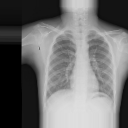

Train Label: 0


In [14]:
import numpy as np
from google.colab.patches import cv2_imshow
import cv2

# Load the numpy arrays
train_images = np.load('/content/curated-covid19-chest-xray-dataset/imagefiles/train_img_aug.npy')
train_labels = np.load('/content/curated-covid19-chest-xray-dataset/labelfiles/train_labels_aug.npy')

# Display the first image from train_images
cv2_imshow(train_images[0])
print('Train Label:', train_labels[0])

# Wait for a key press and then close the windows
cv2.waitKey(0)
cv2.destroyAllWindows()

### Checking if train and val dataset are normalized

In [15]:
# Check if the normalized images are valid
train_images_norm = np.load('/content/curated-covid19-chest-xray-dataset/imagefiles/train_img_aug.npy')
val_images_norm = np.load('/content/curated-covid19-chest-xray-dataset/imagefiles/val_img.npy')

is_normalized = np.all(train_images_norm >= 0) and np.all(train_images_norm <= 1) and np.all(val_images_norm >= 0) and np.all(val_images_norm <= 1)

print('Are the normalized images valid?', is_normalized)

Are the normalized images valid? False


### Normalizing train and val dataset

In [16]:
import numpy as np

# Load the augmented train images
train_images_aug = np.load('/content/curated-covid19-chest-xray-dataset/imagefiles/train_img_aug.npy')

# Normalize the train images
train_images_aug_norm = train_images_aug.astype('float32') / 255.0

# Save the normalized train images to a new .npy file
np.save('/content/curated-covid19-chest-xray-dataset/imagefiles/train_img_norm.npy', train_images_aug_norm)


# Load the validation images
val_images_aug = np.load('/content/curated-covid19-chest-xray-dataset/imagefiles/val_img.npy')

# Normalize the validation images
val_images_aug_norm = val_images_aug.astype('float32') / 255.0

# Save the normalized validation images to a new .npy file
np.save('/content/curated-covid19-chest-xray-dataset/imagefiles/val_img_norm.npy', val_images_aug_norm)

### Checking if train and val dataset are normalized after applying normalization

In [17]:
import numpy as np

# Check if the normalized images are valid
train_images_norm = np.load('/content/curated-covid19-chest-xray-dataset/imagefiles/train_img_norm.npy')
val_images_norm = np.load('/content/curated-covid19-chest-xray-dataset/imagefiles/val_img_norm.npy')

is_normalized = np.all(train_images_norm >= 0) and np.all(train_images_norm <= 1) and np.all(val_images_norm >= 0) and np.all(val_images_norm <= 1)

print('Are the normalized images valid?', is_normalized)

Are the normalized images valid? True


### Applying OHE on train and val labels

In [18]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Load the normalized validation images and labels
val_images_norm = np.load('/content/curated-covid19-chest-xray-dataset/imagefiles/val_img_norm.npy')
val_labels = np.load('/content/curated-covid19-chest-xray-dataset/labelfiles/val_labels.npy')

# Apply one-hot encoding to the validation labels
ohe = OneHotEncoder()
val_labels_ohe = ohe.fit_transform(val_labels.reshape(-1, 1)).toarray()

# Save the normalized and one-hot encoded validation images and labels to new .npy files
np.save('/content/curated-covid19-chest-xray-dataset/imagefiles/final_val_img.npy', val_images_norm)
np.save('/content/curated-covid19-chest-xray-dataset/labelfiles/final_val_labels.npy', val_labels_ohe)


# Load the normalized and augmented train images and labels
train_images_norm = np.load('/content/curated-covid19-chest-xray-dataset/imagefiles/train_img_norm.npy')
train_labels_aug = np.load('/content/curated-covid19-chest-xray-dataset/labelfiles/train_labels_aug.npy')

# Apply one-hot encoding to the train labels
train_labels_ohe = ohe.fit_transform(train_labels_aug.reshape(-1, 1)).toarray()

# Save the normalized and one-hot encoded train images and labels to new .npy files
np.save('/content/curated-covid19-chest-xray-dataset/imagefiles/final_train_img.npy', train_images_norm)
np.save('/content/curated-covid19-chest-xray-dataset/labelfiles/final_train_labels.npy', train_labels_ohe)

### Displaying final train and val images

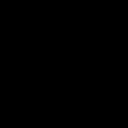

Final Train Label: [1. 0. 0.]


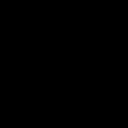

Final Validation Label: [1. 0. 0.]


In [19]:
import numpy as np
from google.colab.patches import cv2_imshow
import cv2

# Load the numpy arrays
train_images = np.load('/content/curated-covid19-chest-xray-dataset/imagefiles/final_train_img.npy')
train_labels = np.load('/content/curated-covid19-chest-xray-dataset/labelfiles/final_train_labels.npy')
val_images = np.load('/content/curated-covid19-chest-xray-dataset/imagefiles/final_val_img.npy')
val_labels = np.load('/content/curated-covid19-chest-xray-dataset/labelfiles/final_val_labels.npy')

# Display the first image from train_images
cv2_imshow(train_images[0])
print('Final Train Label:', train_labels[0])

# Display the first image from val_images
cv2_imshow( val_images[0])
print('Final Validation Label:', val_labels[0])

# Wait for a key press and then close the windows
cv2.waitKey(0)
cv2.destroyAllWindows()

### Building the model

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
from keras import metrics

# Load the normalized and one-hot encoded train and validation images and labels
train_images_norm = np.load('/content/curated-covid19-chest-xray-dataset/imagefiles/final_train_img.npy')
train_labels_ohe = np.load('/content/curated-covid19-chest-xray-dataset/labelfiles/final_train_labels.npy')
val_images_norm = np.load('/content/curated-covid19-chest-xray-dataset/imagefiles/final_val_img.npy')
val_labels_ohe = np.load('/content/curated-covid19-chest-xray-dataset/labelfiles/final_val_labels.npy')

# Define the VGG16 model
vgg = VGG16(include_top=False, input_shape=(128, 128, 3))

# Set the trainable layers
for layer in vgg.layers:
    layer.trainable = False

# Define the CNN model
model = Sequential()
model.add(vgg)
model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# Add more dense, batch normalization, and dropout layers
model.add(Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy', metrics.Precision(), metrics.Recall()]) #lr = 1e-3

# Train the model
hist = model.fit(train_images_norm, train_labels_ohe, epochs=50, validation_data=(val_images_norm, val_labels_ohe))

Epoch 1/50
97/97 [==============================] - 14s 85ms/step - loss: 32.4634 - accuracy: 0.7522 - precision_1: 0.7626 - recall_1: 0.7470 - val_loss: 25.7652 - val_accuracy: 0.8175 - val_precision_1: 0.8369 - val_recall_1: 0.8001
Epoch 2/50
97/97 [==============================] - 7s 71ms/step - loss: 21.7101 - accuracy: 0.8436 - precision_1: 0.8491 - recall_1: 0.8380 - val_loss: 17.8407 - val_accuracy: 0.8273 - val_precision_1: 0.8444 - val_recall_1: 0.8050
Epoch 3/50
97/97 [==============================] - 8s 78ms/step - loss: 15.5908 - accuracy: 0.8774 - precision_1: 0.8844 - recall_1: 0.8680 - val_loss: 13.4435 - val_accuracy: 0.6871 - val_precision_1: 0.6984 - val_recall_1: 0.6578
Epoch 4/50
97/97 [==============================] - 7s 71ms/step - loss: 11.1688 - accuracy: 0.8868 - precision_1: 0.8929 - recall_1: 0.8761 - val_loss: 9.8649 - val_accuracy: 0.7539 - val_precision_1: 0.7621 - val_recall_1: 0.7273
Epoch 5/50
97/97 [==============================] - 7s 74ms/step - l

### Saving the trained model

In [3]:
# Save the model
model.save('/content/drive/MyDrive/Projects/Covid-19 Chest XRAY/chest_xray.h5')

### Model accuracy graph

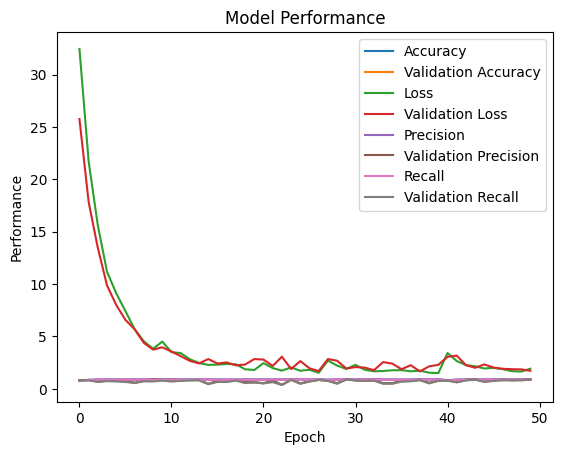

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['precision_1'])
plt.plot(hist.history['val_precision_1'])
plt.plot(hist.history['recall_1'])
plt.plot(hist.history['val_recall_1'])
plt.title("Model Performance")
plt.ylabel("Performance")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","Loss","Validation Loss", "Precision", "Validation Precision", "Recall", "Validation Recall"])
plt.show()

### Classification report

58/58 [==============================] - 3s 40ms/step
              precision    recall  f1-score   support

           0       0.81      0.91      0.85       654
           1       0.94      0.94      0.94       256
           2       0.93      0.85      0.89       931

    accuracy                           0.88      1841
   macro avg       0.89      0.90      0.89      1841
weighted avg       0.89      0.88      0.88      1841



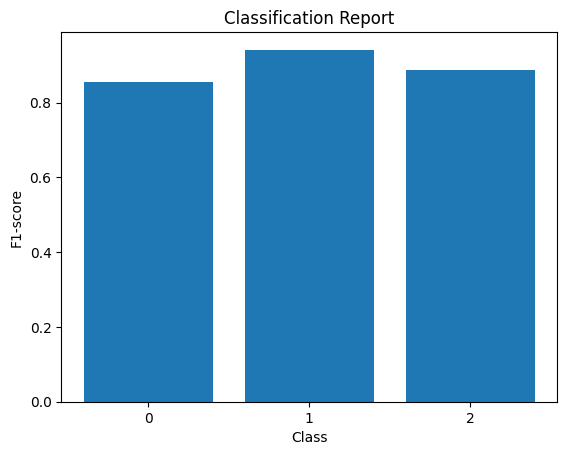

In [6]:
from keras.models import load_model
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load your trained model from the .h5 file
classifier = load_model('/content/drive/MyDrive/Projects/Covid-19 Chest XRAY/chest_xray.h5')

# Load the validation data from .npy files
X_val = np.load('/content/curated-covid19-chest-xray-dataset/imagefiles/final_val_img.npy')
y_val = np.load('/content/curated-covid19-chest-xray-dataset/labelfiles/final_val_labels.npy')

# Use the loaded model to make predictions on the validation data
y_pred = classifier.predict(X_val)
y_pred = np.argmax(y_pred, axis=1) # convert to categorical values

# Generate a classification report
report = classification_report(np.argmax(y_val, axis=1), y_pred)

# Print the classification report
print(report)

# Generate a classification report using y_true and y_pred
report_dict = classification_report(np.argmax(y_val, axis=1), y_pred, output_dict=True)

# Extract the F1-score for each class
target_names = list(report_dict.keys())[:-3]
f1_scores = [report_dict[key]['f1-score'] for key in target_names]

# Create a bar chart of the F1-score for each class
fig, ax = plt.subplots()
ax.bar(target_names, f1_scores)
ax.set_xlabel('Class')
ax.set_ylabel('F1-score')
ax.set_title('Classification Report')
plt.show()

### Confusion matrix

58/58 [==============================] - 3s 42ms/step


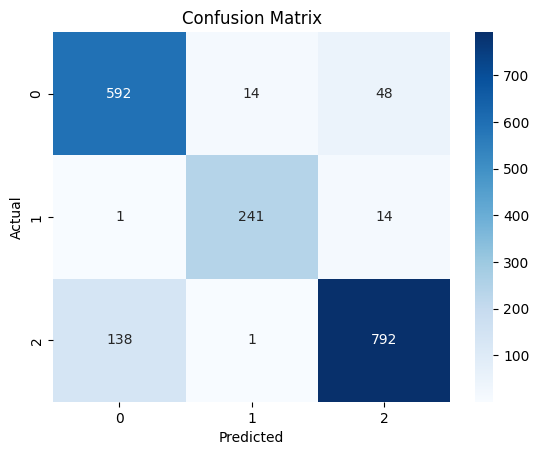

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load your trained model from the .h5 file
classifier = load_model('/content/drive/MyDrive/Projects/Covid-19 Chest XRAY/chest_xray.h5')

# Load the validation data from .npy files
X_val = np.load('/content/curated-covid19-chest-xray-dataset/imagefiles/final_val_img.npy')
y_val = np.load('/content/curated-covid19-chest-xray-dataset/labelfiles/final_val_labels.npy')

# Use the loaded model to make predictions on the validation data
y_pred = classifier.predict(X_val)
y_pred = np.argmax(y_pred, axis=1) # convert to categorical values

# Generate a confusion matrix
cm = confusion_matrix(np.argmax(y_val, axis=1), y_pred)

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### ROC Curve

58/58 [==============================] - 3s 41ms/step


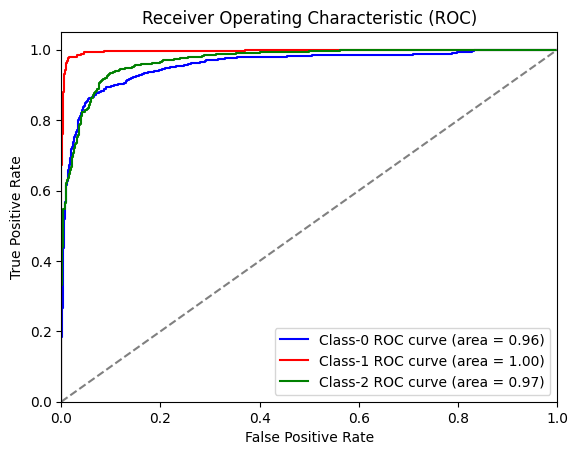

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import tensorflow as tf


# Load the training and validation data
X_train = np.load('/content/curated-covid19-chest-xray-dataset/imagefiles/final_train_img.npy')
y_train = np.load('/content/curated-covid19-chest-xray-dataset/labelfiles/final_train_labels.npy')

X_val = np.load('/content/curated-covid19-chest-xray-dataset/imagefiles/final_val_img.npy')
y_val = np.load('/content/curated-covid19-chest-xray-dataset/labelfiles/final_val_labels.npy')

# Load your trained model
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/Projects/Covid-19 Chest XRAY/chest_xray.h5')

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Compute the false positive rate (fpr), true positive rate (tpr), and thresholds for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = y_val.shape[1]  # Number of classes

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class with class labels in the legend
plt.figure()

colors = ['blue', 'red', 'green']  # Customize colors for each class

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], label='Class-{} ROC curve (area = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()